<h1>Product Sales Analysis Objective


<p>

Q: What was the best month for sales? How much was earned that month?

Q: What product sold the most? Why do you think it sold the most?

Q: What City had the highest number of sales?

Q: What products are most often sold together?


___

<h2>Import Libraries

In [242]:
import pandas as pd
import numpy as np
import glob
import os 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

<h2>Merge 12 Monthly CSVs

In [243]:
# read the csv file into a dataframe
df = pd.read_csv("/Users/melody/Sales_January_2019.csv")
df

# read the path
file_path = "/Users/melody/"

# list all the files from the directory
file_list = os.listdir(file_path)
file_list

# list only the csv files from the directory
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [244]:
# concatenate all 12 csvs together into one csv

df_concat = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
df_concat


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [245]:
# export combined csv
df_concat.to_csv( "2019Data.csv", index=False, encoding='utf-8-sig')

<h2>Data Audit

In [246]:
# import combined csv
df = pd.read_csv("/Users/melody/2019Data.csv")

# columns present in the dataset 
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [247]:
# a concise summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [248]:
# check missing values 
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [249]:
# get rid of the missing values
df = df.dropna(how='all')
"NaN Value:"
df[df.isna().any(axis=1)]
# future warning! ValueError: invalid literal for int() with base 10: 'Or'
"Clean Future Warnings:"
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [250]:
# check again for missing values 
df.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [251]:
# perfect! we've got rid of the missing values 

# convert Order Date to datetime 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df
# convert Quantity Ordered to numbers
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df

# convert Price Each to numbers
df['Price Each'] = pd.to_numeric(df['Price Each'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [252]:
# add Sales column to the dataset 
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# split the address and get cities and state columns from it 

def get_city(address):
    return address.split(',')[1]
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['Cities'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    

<h2>Exploratory Data Analysis

<h3>What is the overall sales trend?

In [193]:
# the earliest order date on the dataset
df['Order Date'].min()

Timestamp('2019-01-01 03:07:00')

In [194]:
# the latest order date on the dataset
df['Order Date'].max()

Timestamp('2020-01-01 05:13:00')

In [213]:
# group by month 
df['month'] = df['Order Date'].apply(lambda x: x.strftime('%y-%m'))
df_month = df.groupby('month').sum('Sales').reset_index()


In [196]:
# to drop the last row which consists a bit of data from year 2020
df_month = df_month[:-1] 

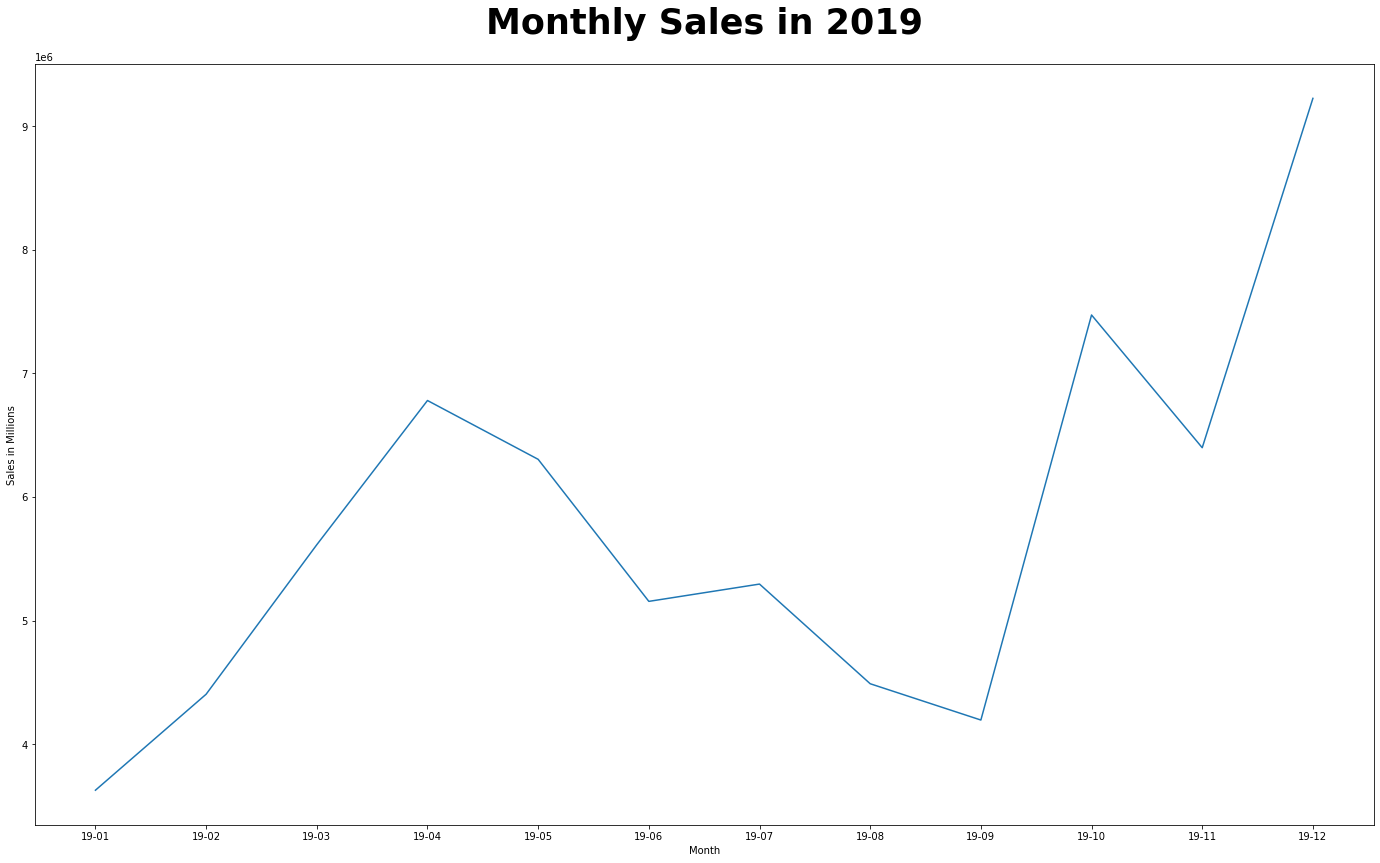

In [211]:
# plot monthly sales trend 
plt.figure(figsize=(24, 14))
plt.plot(df_month['month'],df_month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in Millions')
plt.title('Monthly Sales in 2019',  weight="bold", 
    fontsize=35, 
    pad=30 )
plt.show()

<h4>The best month for sales is December, which has a total sales of USD$9,226,886.68.

______

<h3>Which are the top 5 products by sales?

In [198]:
# group product column 
product_sales = pd.DataFrame(df.groupby('Product').sum()['Sales'])
product_sales


,Sales
Product,
20in Monitor,908297.42
27in 4K Gaming Monitor,4870195.12
27in FHD Monitor,2264849.00
34in Ultrawide Monitor,4711116.02
AA Batteries (4-pack),212236.80
AAA Batteries (4-pack),185481.66
Apple Airpods Headphones,4698300.00
Bose SoundSport Headphones,2691130.86
Flatscreen TV,2891400.00


In [199]:
# sort from top sales to low sales 
product_sales = product_sales.sort_values('Sales', ascending=False)

# top 5 most products with the most sales 
product_sales[:5]

,Sales
Product,
Macbook Pro Laptop,16075200.00
iPhone,9588600.00
ThinkPad Laptop,8259917.40
Google Phone,6638400.00
27in 4K Gaming Monitor,4870195.12


<h4> The top 5 products with the most sales are Macbook Pro Laptop, Iphone, ThinkPad Laptop, Google Phone, and 27in Gaming Monitor. 

_____

<h3> Which are the most selling products (Quantity)?

In [200]:
# group product name 
most_sell_product = pd.DataFrame(df.groupby('Product').sum()['Quantity Ordered'])
# sort the list in descending format
most_sell_product = most_sell_product.sort_values('Quantity Ordered',ascending=False)
# top 5 most selling product 
most_sell_product[:5]

,Quantity Ordered
Product,
AAA Batteries (4-pack),62034
AA Batteries (4-pack),55270
USB-C Charging Cable,47950
Lightning Charging Cable,46434
Wired Headphones,41114


<h4>The most selling products are AAA Batteries, AA Batteries, USB-C Charging Cable, Lightning Charging Cable, and Wired Headphones. 

_____

<h3>What City had the highest number of sales?

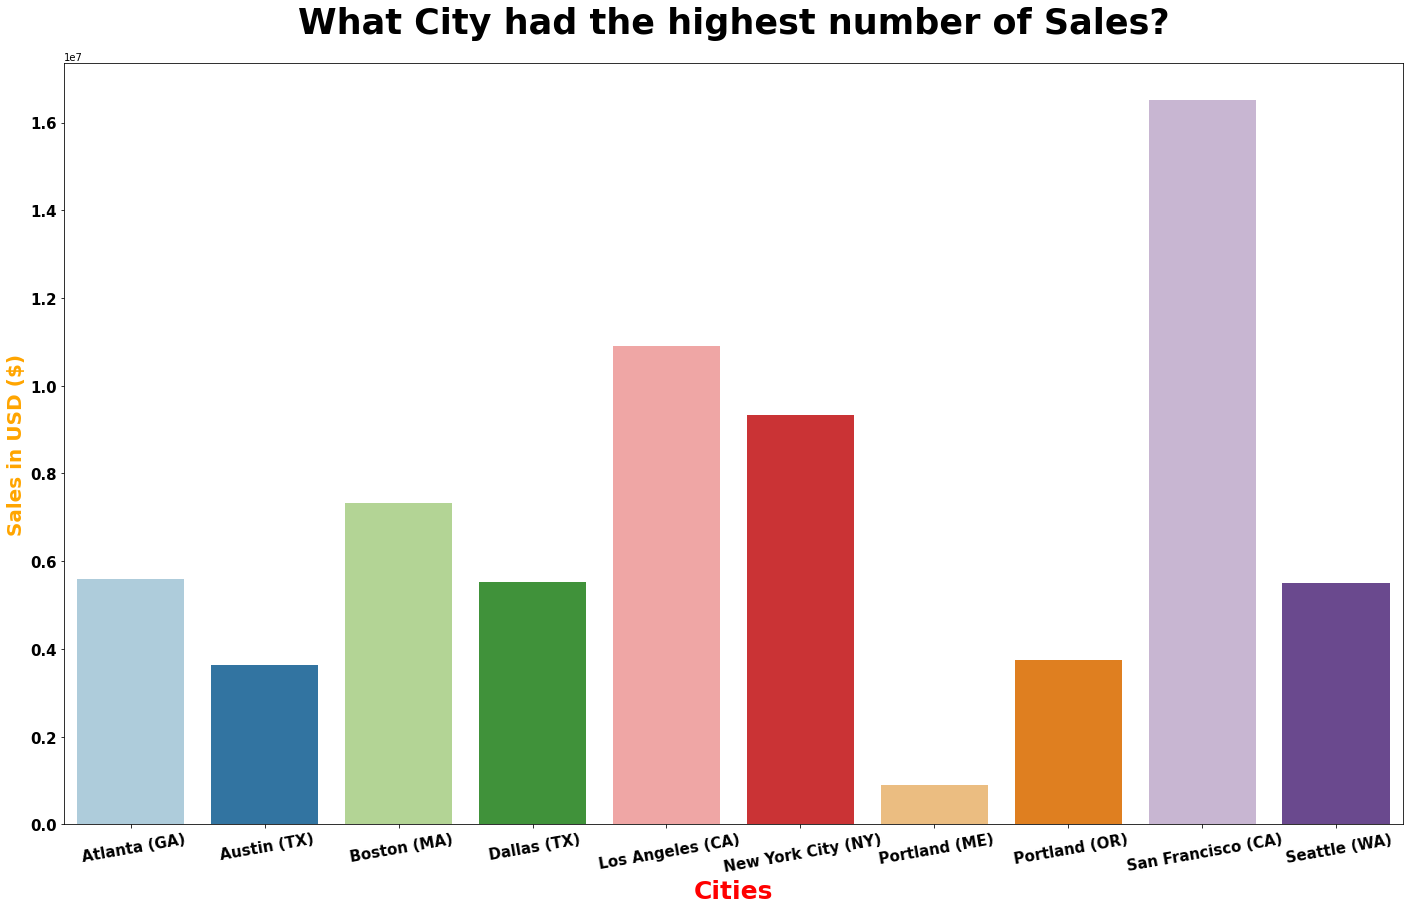

In [207]:
highest_number_of_sales = pd.DataFrame(df.groupby('Cities').sum().astype('int'))
# plot the bar graph
plt.figure(figsize=(24, 14))

sns.barplot( 
    x=highest_number_of_sales.index, 
    y=highest_number_of_sales["Sales"], 
    data=highest_number_of_sales, 
    palette="Paired" )

# graph customization 

plt.title( 
    "What City had the highest number of Sales?", 
    weight="bold", 
    fontsize=35, 
    pad=30 )
plt.xlabel( 
    "Cities", 
    weight="bold", 
    color="red", 
    fontsize=25, 
    loc="center" )
plt.xticks( 
    weight="bold", 
    fontsize=15, 
    rotation=10)
plt.ylabel( 
    "Sales in USD ($)", 
    weight="bold", 
    color="orange", 
    fontsize=20 )
plt.yticks( 
    weight="bold", 
    fontsize=15 );

<h4> Turns out San Francisco has the most sales through year 2019, follows by Los Angeles and New York City. 

______

<h3>What products are most often sold together?

In [262]:
# import libraries 
from itertools import combinations
from collections import Counter

# drop duplicates 
bundled = df[df['Order ID'].duplicated(keep=False)]

bundled['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

bundled = bundled[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()
# make a for loop
for row in bundled['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(5):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


/var/folders/_8/jzy93qd56j19jbctrb2wqlxw0000gn/T/ipykernel_16395/456889227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundled['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


The 5 most sold pairs are 
- iPhone and Lightning Charging Cable
- Google Phone and USB-C Charging Cable
- iPhone and Wired Headphones
- Google Phone and Wired Headphones
- Vareebadd Phone and USB-C Charging Cable
    
It is recommended to sell the products in pairs. 